In [28]:
import pandas as pd
import numpy as np
import glob
import os
import csv
import re
import ast
from pandas.io.json import json_normalize
from pandas.io import json
import matplotlib.pyplot as plt
import seaborn as sns

current_file_path = os.path.abspath(os.path.join("__file__" ,"../.."))
raw_data_path = os.path.join(current_file_path,'raw')
ext_data_path = os.path.join(current_file_path,'external')
data_files = glob.glob(os.path.join(ext_data_path, '*.csv'), recursive=False)

import re
import ntpath
pattern = r'(.+)_cleaned.csv$'  #extract filenames of cleaned files for dict keys

#dict to contain all dataframes
data = {}
for file in data_files:
    matchobj = re.search(pattern, ntpath.basename(file))
    data[matchobj.group(1)] = pd.read_csv(file, index_col = ['movie_id', 'title'])    


In [8]:
data.keys()


dict_keys(['tmdb_cast_credit', 'tmdb_crew_credit', 'tmdb_movie_genres', 'tmdb_movie_keywords', 'tmdb_movie_main', 'tmdb_movie_production_companies', 'tmdb_movie_production_countries', 'tmdb_movie_spoken_languages'])

In [9]:
for key in data.keys():
    print(key)
    print(data[key].info(), '\n')

tmdb_cast_credit
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 106257 entries, (19995, Avatar) to (25975, My Date with Drew)
Data columns (total 7 columns):
cast_id      106257 non-null int64
character    105574 non-null object
credit_id    106257 non-null object
gender       106257 non-null int64
id           106257 non-null int64
name         106257 non-null object
order        106257 non-null int64
dtypes: int64(4), object(3)
memory usage: 4.9+ MB
None 

tmdb_crew_credit
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 129581 entries, (19995, Avatar) to (25975, My Date with Drew)
Data columns (total 6 columns):
credit_id     129581 non-null object
department    129581 non-null object
gender        129581 non-null int64
id            129581 non-null int64
job           129581 non-null object
name          129581 non-null object
dtypes: int64(2), object(4)
memory usage: 4.5+ MB
None 

tmdb_movie_genres
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 12160 entries, (19995, Avata

In [10]:
print(data['tmdb_movie_main'].budget.nlargest(10))
print('\n')
print(data['tmdb_movie_main'].revenue.nlargest(10))

movie_id  title                                      
1865      Pirates of the Caribbean: On Stranger Tides    380000000
285       Pirates of the Caribbean: At World's End       300000000
99861     Avengers: Age of Ultron                        280000000
1452      Superman Returns                               270000000
49529     John Carter                                    260000000
38757     Tangled                                        260000000
559       Spider-Man 3                                   258000000
57201     The Lone Ranger                                255000000
49026     The Dark Knight Rises                          250000000
767       Harry Potter and the Half-Blood Prince         250000000
Name: budget, dtype: int64


movie_id  title                     
19995     Avatar                        2787965087
597       Titanic                       1845034188
24428     The Avengers                  1519557910
135397    Jurassic World                1513528810
168259

In [20]:
data['tmdb_movie_main']['net'] = data['tmdb_movie_main'].revenue - data['tmdb_movie_main'].budget
print(data['tmdb_movie_main'].net.nlargest(10))
print('\n')
print(data['tmdb_movie_main'].net.nsmallest(10))

movie_id  title                                        
19995     Avatar                                           2550965087
597       Titanic                                          1645034188
135397    Jurassic World                                   1363528810
168259    Furious 7                                        1316249360
24428     The Avengers                                     1299557910
99861     Avengers: Age of Ultron                          1125403694
109445    Frozen                                           1124219009
211672    Minions                                          1082730962
122       The Lord of the Rings: The Return of the King    1024888979
68721     Iron Man 3                                       1015439994
Name: net, dtype: int64


movie_id  title                       
57201     The Lone Ranger                -165710090
7978      The Wolfman                    -150000000
10733     The Alamo                      -119180039
50321     Mars Needs Mo

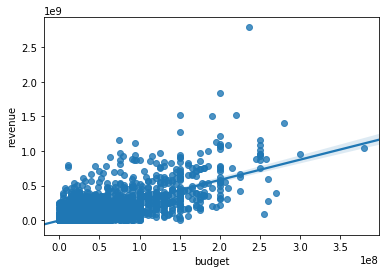

In [32]:
sns.regplot(data=data['tmdb_movie_main'], x='budget', y='revenue')
plt.show()

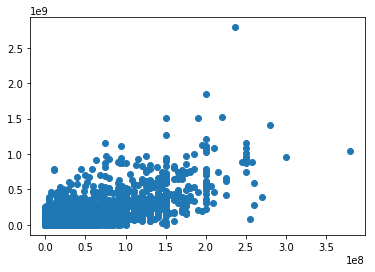

In [34]:
import numpy as np; np.random.seed(1)

#names = np.array(data['tmdb_movie_main'].title)
c = np.random.randint(1,5,size=15)

norm = plt.Normalize(1,4)
cmap = plt.cm.RdYlGn

fig,ax = plt.subplots()
sc = plt.scatter(x=data['tmdb_movie_main'].budget, y=data['tmdb_movie_main'].revenue, cmap=cmap, norm=norm)

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(ind):

    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}, {}".format(" ".join(list(map(str,ind["ind"]))), 
                           " ".join([names[n] for n in ind["ind"]]))
    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.4)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()